In [ ]:
#Social_Network_Ads.csv

**Importing the libraries**

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score,plot_roc_curve
import warnings
warnings.filterwarnings("ignore")

**Importing the dataset**

In [3]:
df=pd.read_csv('/content/Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


**Splitting the dataset into the Training set and Test set**

In [4]:
le=LabelEncoder()
df.Gender=le.fit_transform(df.Gender)
x=df.drop(["User ID",'Purchased'],axis=1)
y=df.Purchased
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=7)

**Feature Scaling**

In [5]:
scale=StandardScaler()

In [6]:
x_train=pd.DataFrame(scale.fit_transform(x_train),columns=x_train.columns)
x_test=pd.DataFrame(scale.fit_transform(x_test),columns=x_test.columns)

**Fitting Random Forest to the Training set**

In [7]:
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)

RandomForestClassifier()

**Predicting the Test set results**

In [8]:
y_pred=RFC.predict(x_test)

**Making the Confusion Matrix**

In [9]:
accuracy_score(y_pred,y_test)

0.9

In [10]:
confusion_matrix(y_test,y_pred)

array([[50,  4],
       [ 4, 22]])

**Visualising the Training set results**

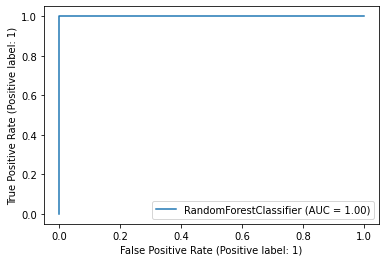

In [11]:
plot_roc_curve(RFC,x_train,RFC.predict(x_train));

**Visualising the Test set results**

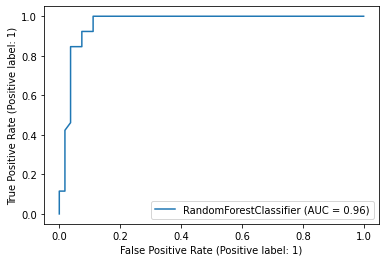

In [12]:
plot_roc_curve(RFC,x_test,y_test);